In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import re

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

In [7]:
posts_df = pd.read_csv("../data/the-reddit-dataset-dataset-posts.csv")
comments_df = pd.read_csv("../data/the-reddit-dataset-dataset-comments.csv")
decor_df = pd.read_csv("../data/cleaned_decor.csv")

=== Posts ===
(20292, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20292 entries, 0 to 20291
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           20292 non-null  int64 
 1   type            20292 non-null  object
 2   id              20292 non-null  object
 3   subreddit.id    20292 non-null  object
 4   subreddit.name  20292 non-null  object
 5   subreddit.nsfw  20292 non-null  bool  
 6   created_utc     20292 non-null  int64 
 7   permalink       20292 non-null  object
 8   domain          20292 non-null  object
 9   url             4976 non-null   object
 10  selftext        15316 non-null  object
 11  title           20292 non-null  object
 12  score           20292 non-null  int64 
dtypes: bool(1), int64(3), object(9)
memory usage: 1.9+ MB
None
              index   created_utc         score
count  20292.000000  2.029200e+04  20292.000000
mean   10145.500000  1.538949e+09      8.2488

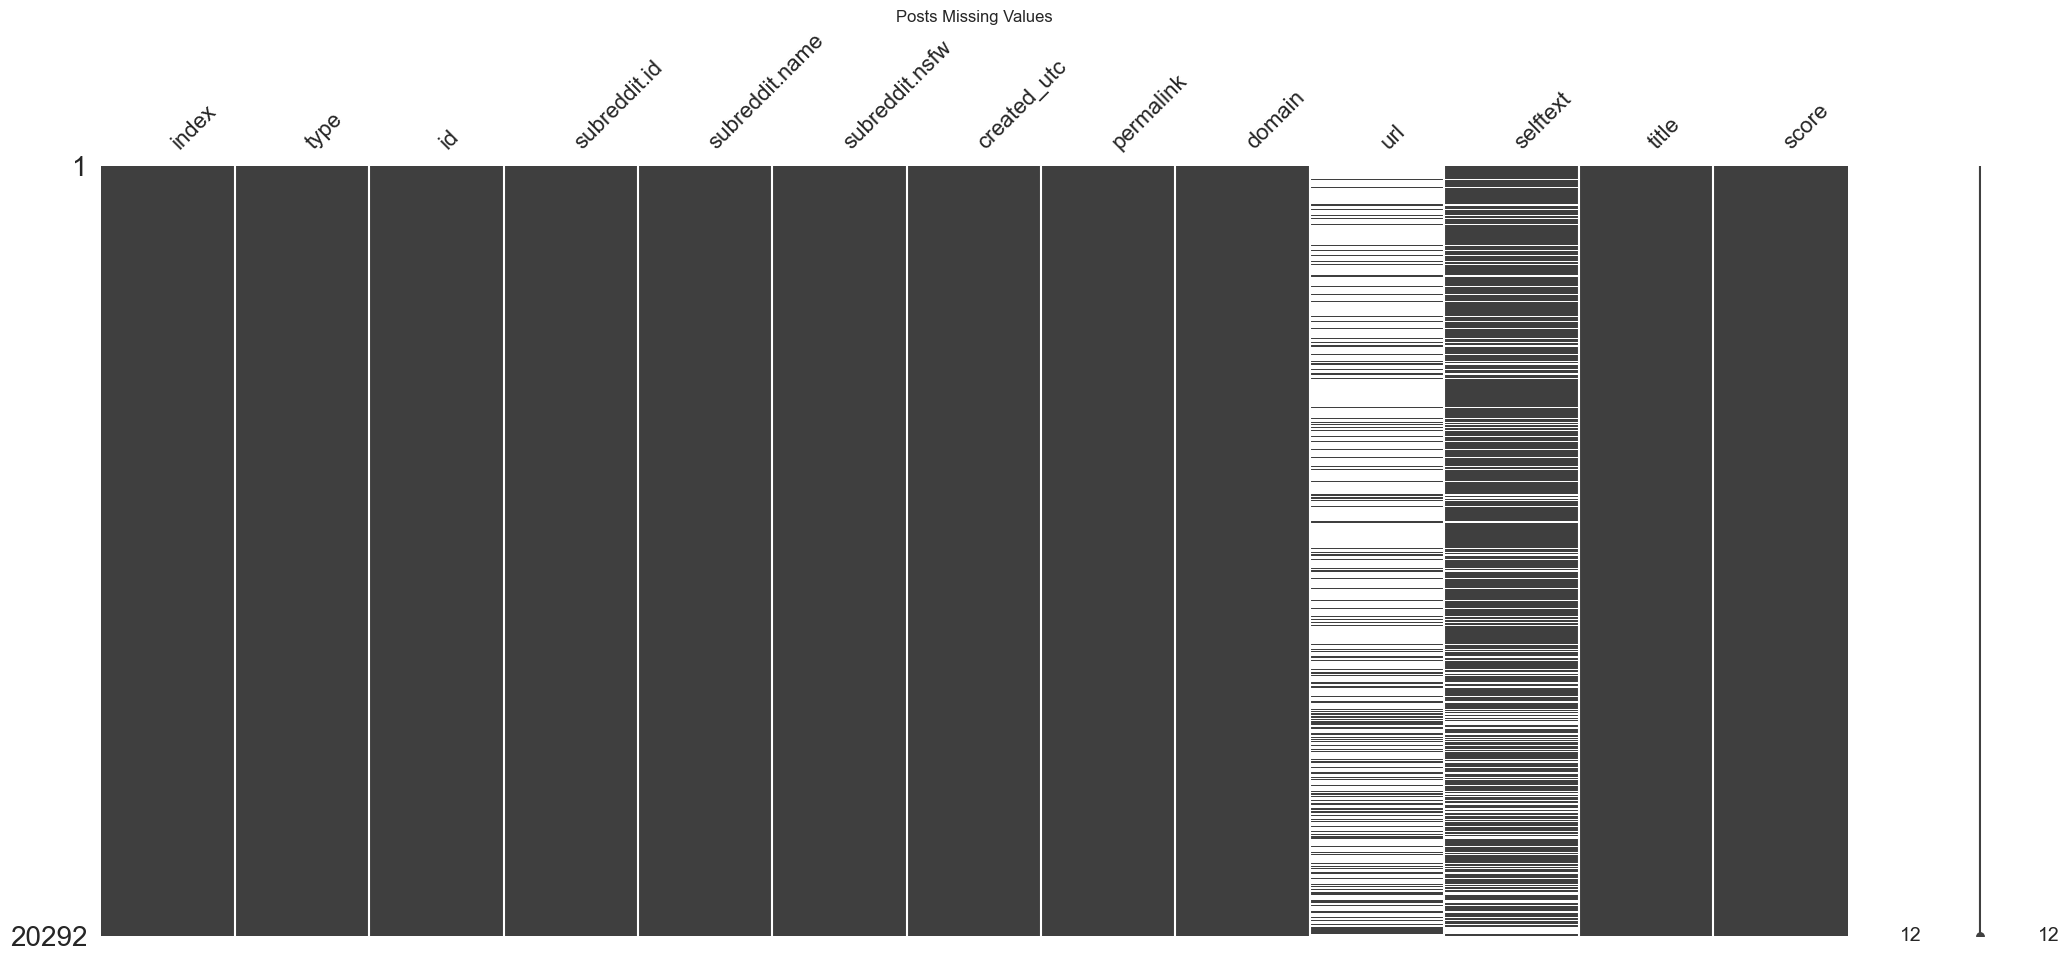

=== Comments ===
(54851, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54851 entries, 0 to 54850
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           54851 non-null  int64  
 1   type            54851 non-null  object 
 2   id              54851 non-null  object 
 3   subreddit.id    54851 non-null  object 
 4   subreddit.name  54848 non-null  object 
 5   subreddit.nsfw  54848 non-null  object 
 6   created_utc     54848 non-null  float64
 7   permalink       54848 non-null  object 
 8   body            54846 non-null  object 
 9   sentiment       47367 non-null  float64
 10  score           54845 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.6+ MB
None
              index   created_utc     sentiment         score
count  54851.000000  5.484800e+04  47367.000000  54845.000000
mean   27425.000000  1.540431e+09      0.296784      2.019382
std    15834.264145  7.5

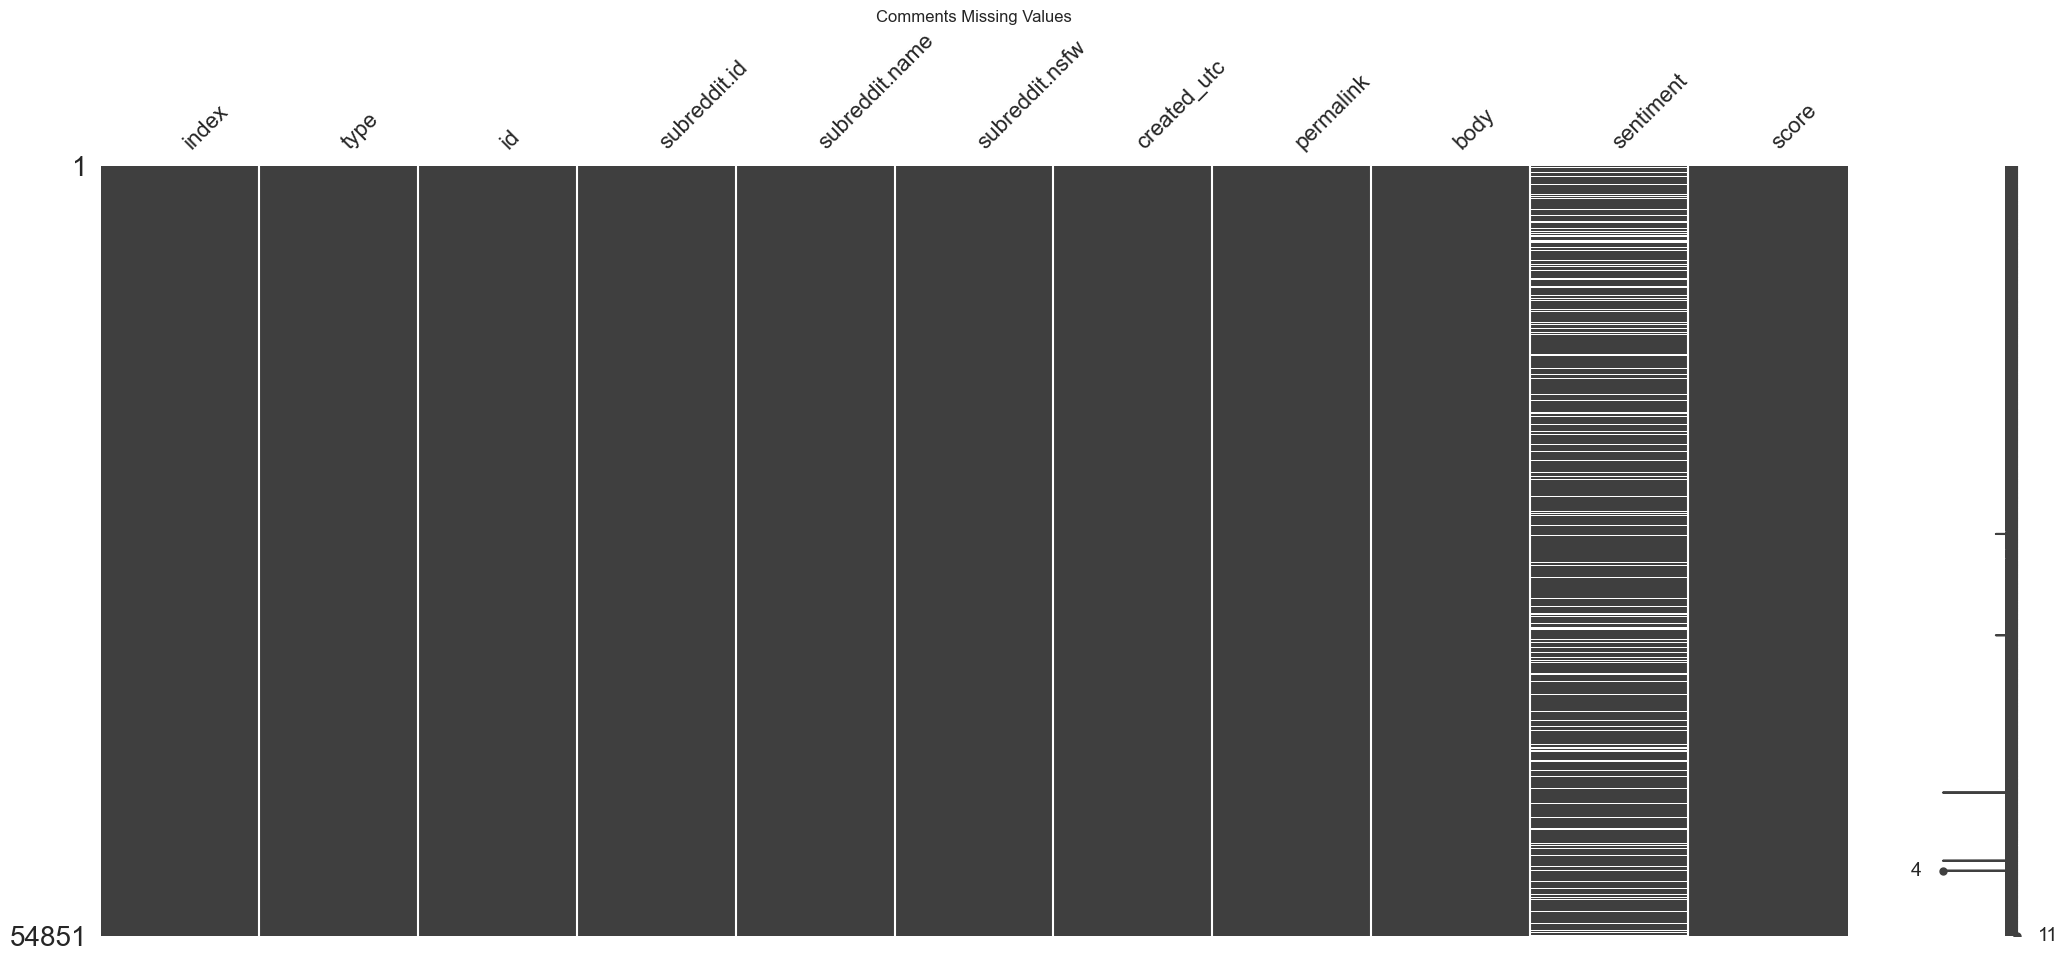

=== Decor ===
(10163, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10163 entries, 0 to 10162
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          10163 non-null  object
 1   brand         10163 non-null  object
 2   rating        10163 non-null  int64 
 3   price         10163 non-null  int64 
 4   actual price  10163 non-null  int64 
 5   discount      10163 non-null  int64 
 6   shipping      10163 non-null  object
 7   category      10163 non-null  object
 8   deals         10163 non-null  object
 9   emi           10163 non-null  object
 10  url           10163 non-null  object
dtypes: int64(4), object(7)
memory usage: 873.5+ KB
None
             rating         price  actual price      discount
count  10163.000000  10163.000000  10163.000000  10163.000000
mean       2.784512   2859.525140   4529.353439     39.063367
std        1.854267   3956.444248   5803.388449     13.858435
min        0.0

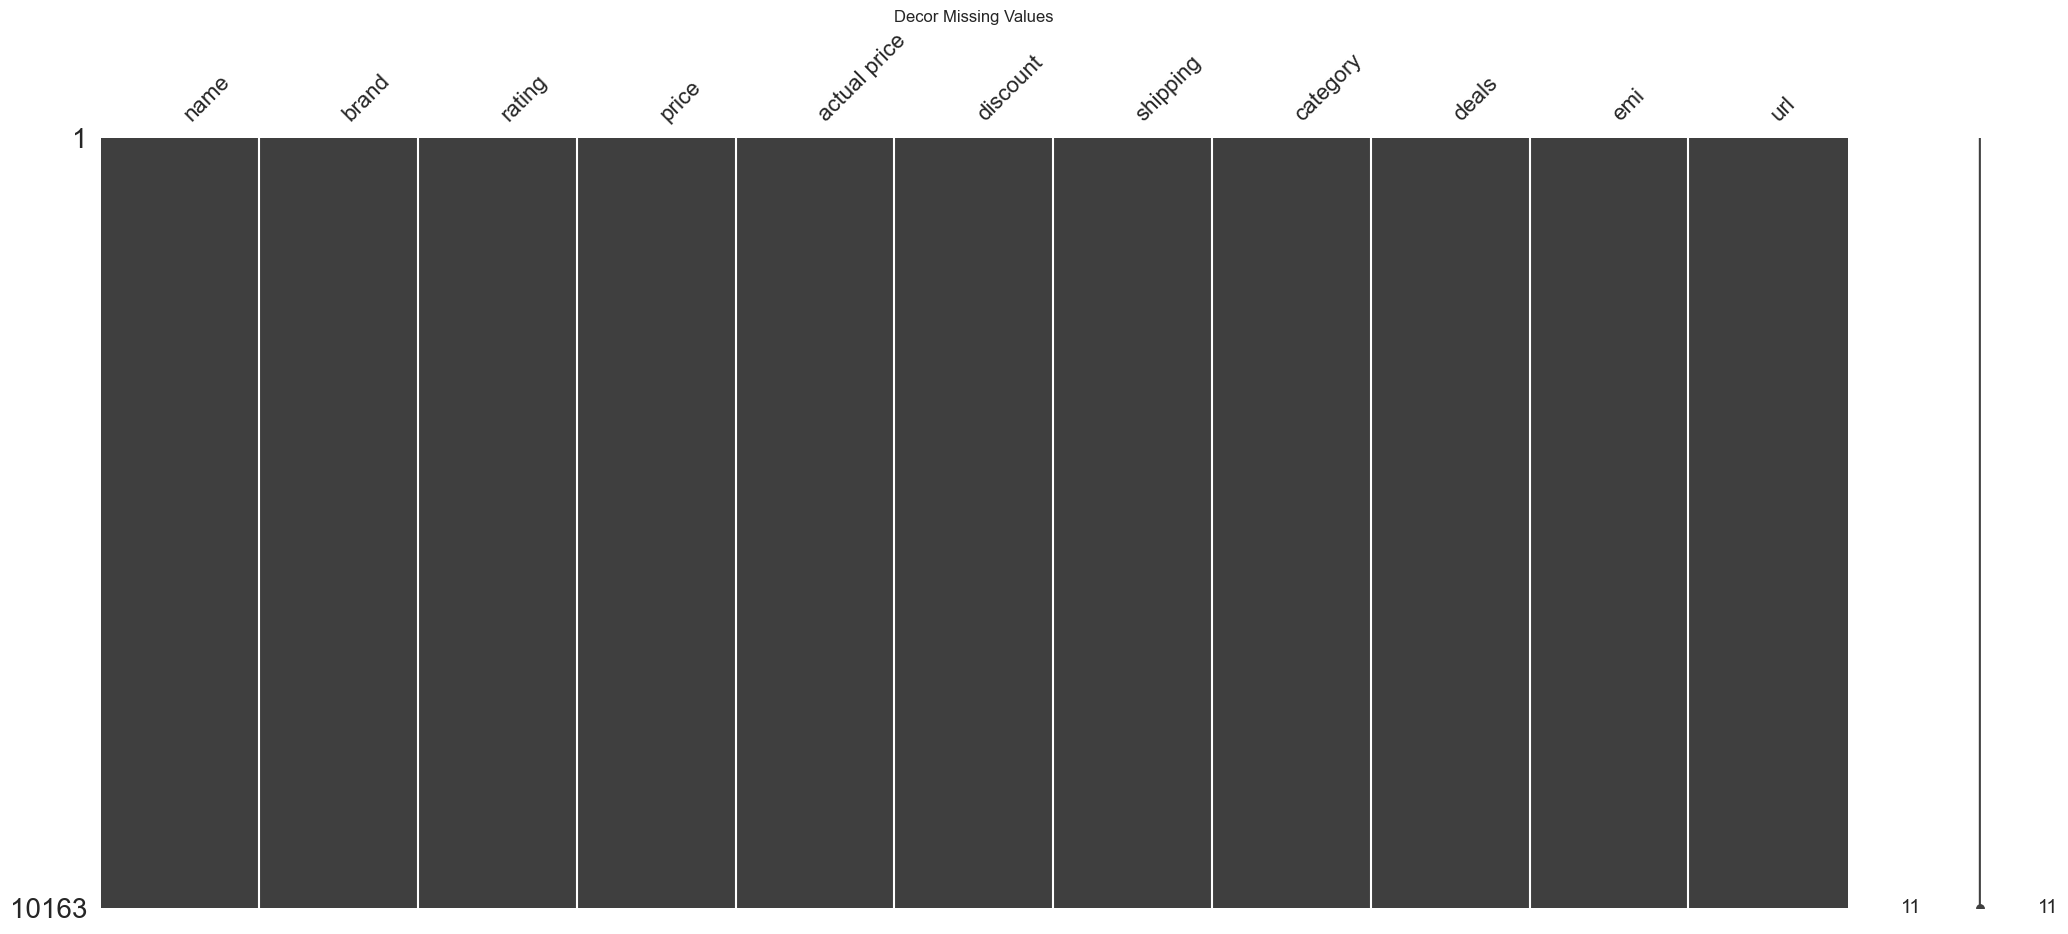

In [8]:
for df, name in zip([posts_df, comments_df, decor_df], ["Posts", "Comments", "Decor"]):
    print(f"=== {name} ===")
    print(df.shape)
    print(df.info())
    print(df.describe())
    msno.matrix(df)
    plt.title(f"{name} Missing Values")
    plt.show()

In [9]:
# 텍스트 길이 컬럼 확인/생성

for col, new_col in [('title', 'title_length'), 
                     ('selftext', 'selftext_length')]:
    if col in posts_df.columns:
        posts_df[new_col] = posts_df[col].fillna("").apply(len)
        
if 'body' in comments_df.columns:
    comments_df['body_length'] = comments_df['body'].fillna("").apply(len)

In [10]:
print(posts_df.columns)


Index(['index', 'type', 'id', 'subreddit.id', 'subreddit.name',
       'subreddit.nsfw', 'created_utc', 'permalink', 'domain', 'url',
       'selftext', 'title', 'score', 'title_length', 'selftext_length'],
      dtype='object')


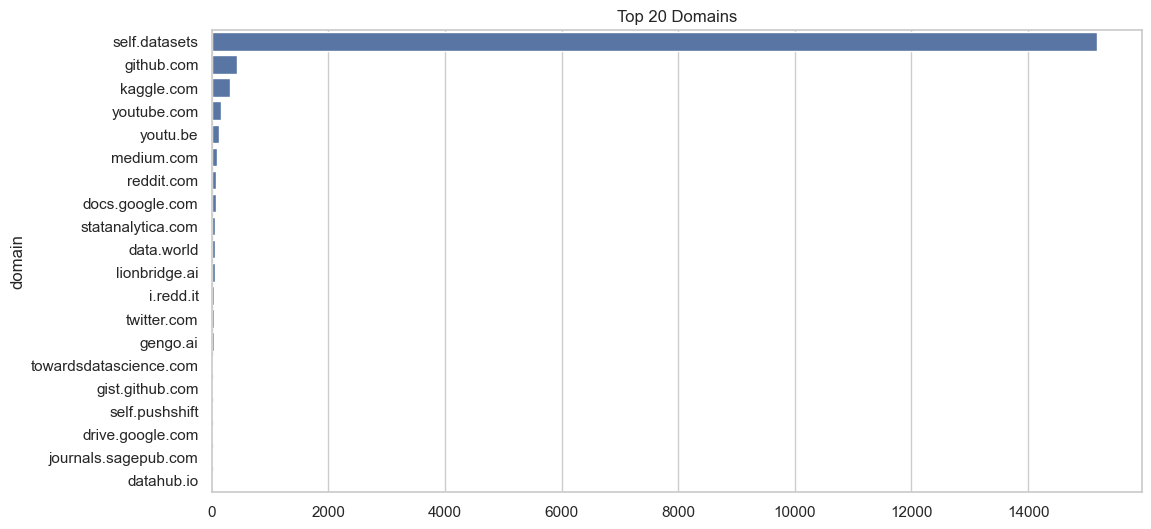

In [11]:
domain_counts = posts_df['domain'].value_counts().head(20)
sns.barplot(x=domain_counts.values, y=domain_counts.index)
plt.title("Top 20 Domains")
plt.show()


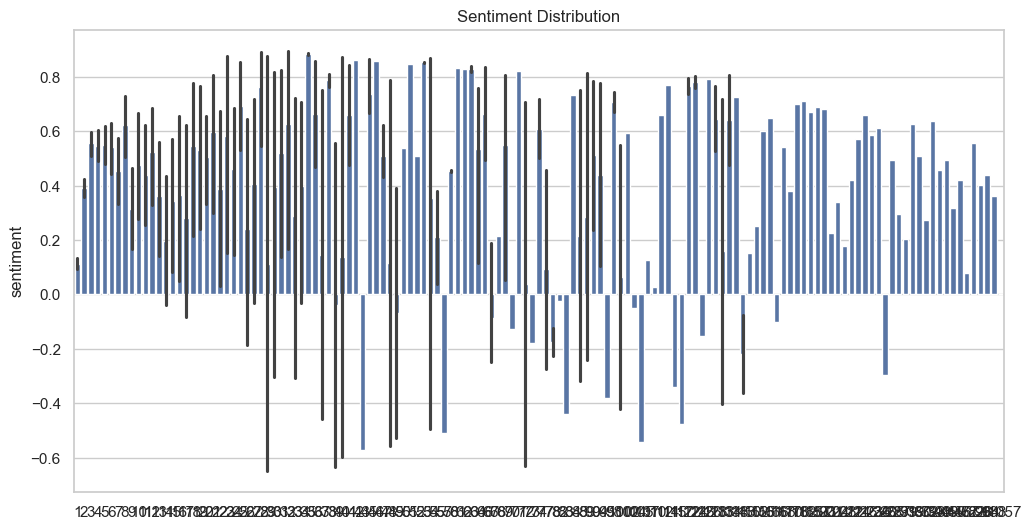

In [12]:
sentiment_counts = comments_df['sentiment'].value_counts()
sns.barplot(x=sentiment_counts.values, y=sentiment_counts.index)
plt.title("Sentiment Distribution")
plt.show()


C:\Users\color\AppData\Local\Temp\ipykernel_2780\300119739.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette="cubehelix")


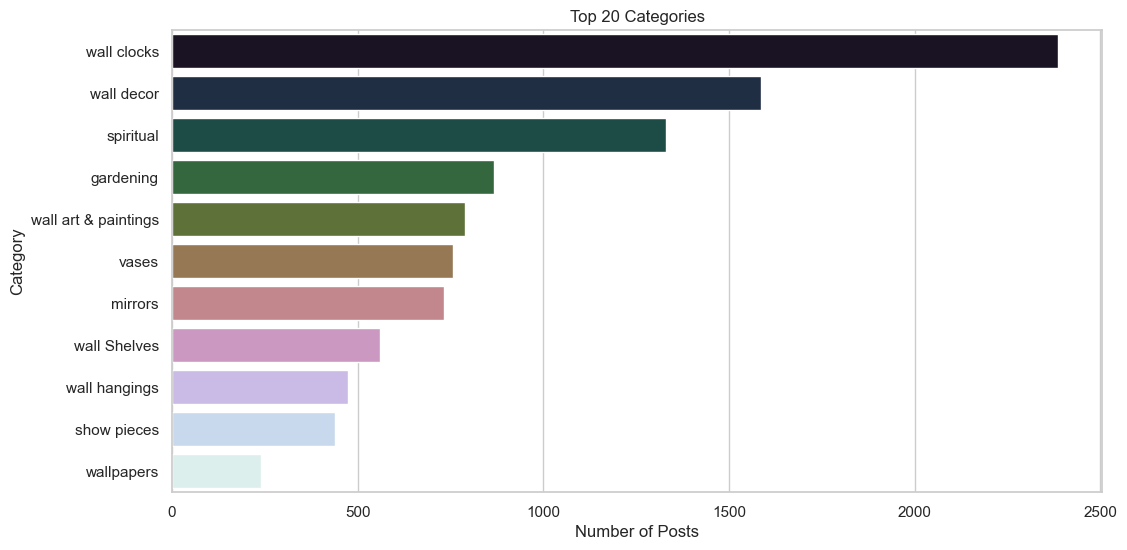

In [13]:
if 'category' in decor_df.columns:
    category_counts = decor_df['category'].value_counts().head(20)
    sns.barplot(x=category_counts.values, y=category_counts.index, palette="cubehelix")
    plt.title("Top 20 Categories")
    plt.xlabel("Number of Posts")
    plt.ylabel("Category")
    plt.show()

In [14]:
print(posts_df['created_utc'].head())

0    1646160815
1    1646159793
2    1646157650
3    1646145753
4    1646141275
Name: created_utc, dtype: int64


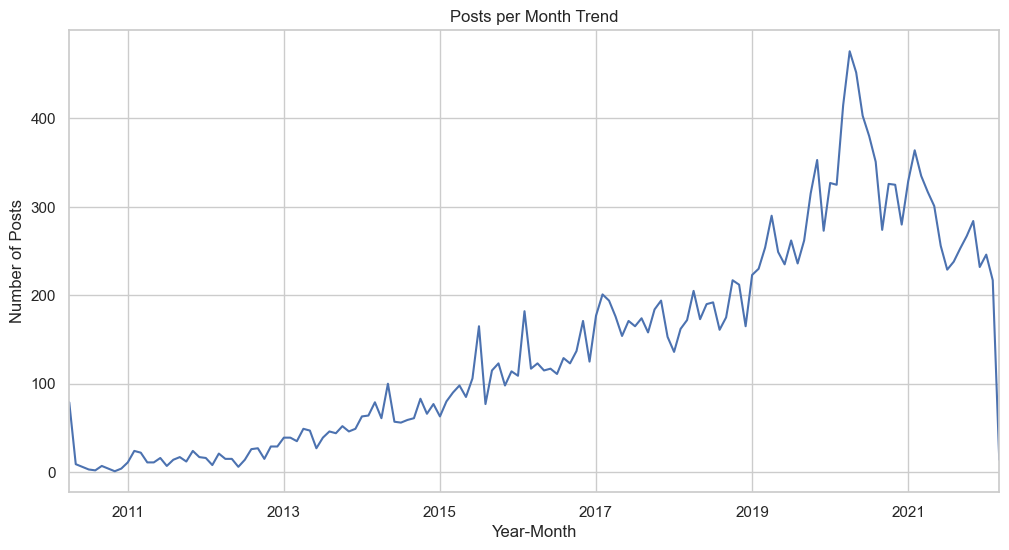

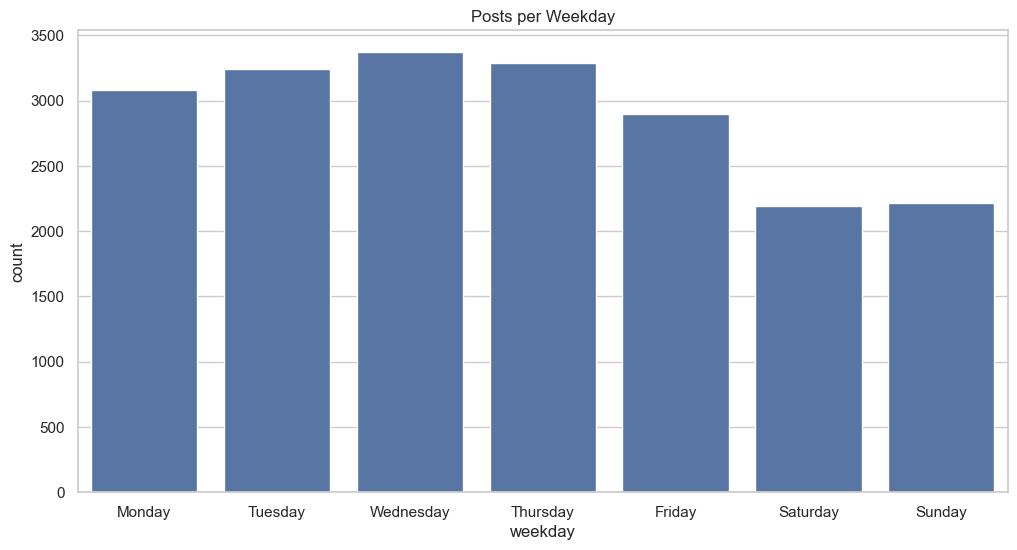

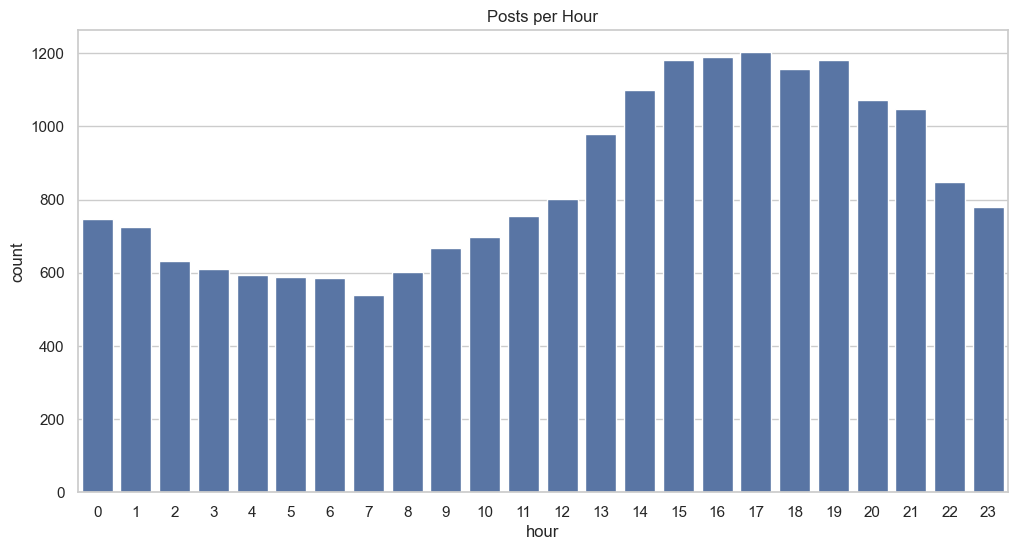

In [15]:
if pd.api.types.is_numeric_dtype(posts_df['created_utc']):
    posts_df['created_utc'] = pd.to_datetime(posts_df['created_utc'], unit='s', errors='coerce')
else:
    posts_df['created_utc'] = pd.to_datetime(posts_df['created_utc'], errors='coerce')

# 2) 시간 컬럼 추가
posts_df['year_month'] = posts_df['created_utc'].dt.to_period('M')
posts_df['weekday'] = posts_df['created_utc'].dt.day_name()
posts_df['hour'] = posts_df['created_utc'].dt.hour

# 3) 월별 포스트 추세
posts_per_month = posts_df.groupby('year_month').size()
posts_per_month.plot(kind='line')
plt.title("Posts per Month Trend")
plt.xlabel("Year-Month")
plt.ylabel("Number of Posts")
plt.show()

# 4) 요일별 포스트 수
sns.countplot(x='weekday',
              data=posts_df,
              order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Posts per Weekday")
plt.show()

# 5) 시간대별 포스트 수
sns.countplot(x='hour', data=posts_df)
plt.title("Posts per Hour")
plt.show()


In [16]:
if 'author' in posts_df.columns:
    top_authors = posts_df['author'].value_counts().head(20)
    sns.barplot(x=top_authors.values, y=top_authors.index, palette="magma")
    plt.title("Top 20 Active Authors")
    plt.xlabel("Number of Posts")
    plt.ylabel("Author")
    plt.show()

In [17]:

comments_df['post_id'] = comments_df['permalink'].str.extract(r'/comments/([^/]+)/')

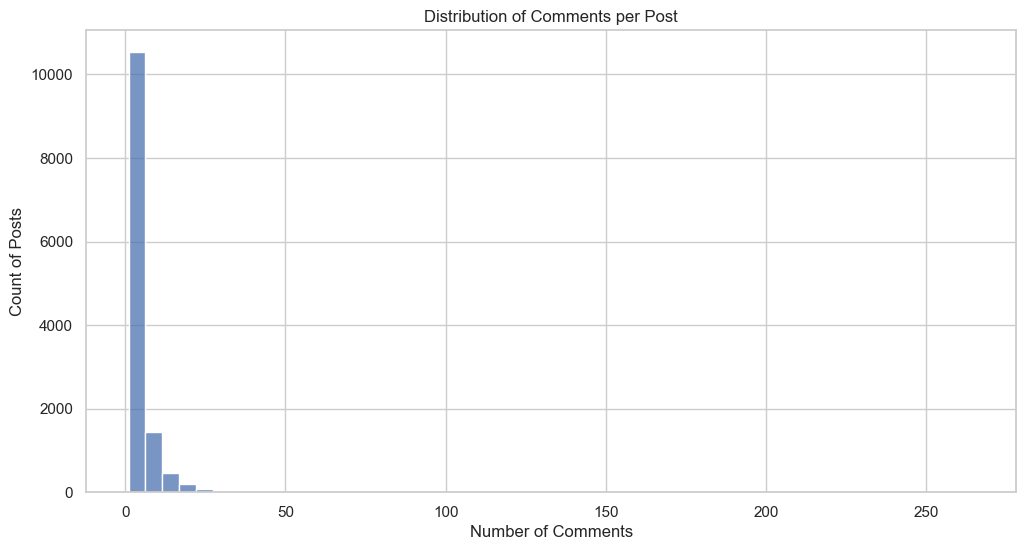

In [18]:
comments_per_post = comments_df.groupby('post_id').size()
sns.histplot(comments_per_post, bins=50, kde=False)
plt.title("Distribution of Comments per Post")
plt.xlabel("Number of Comments")
plt.ylabel("Count of Posts")
plt.show()


In [19]:
comments_per_post = comments_df.groupby('post_id').size()
comments_per_post.name = 'num_comments'


In [20]:
merged_df = posts_df.merge(
    comments_per_post,
    left_on='id',
    right_index=True,
    how='left'
)
merged_df['num_comments'] = merged_df['num_comments'].fillna(0)


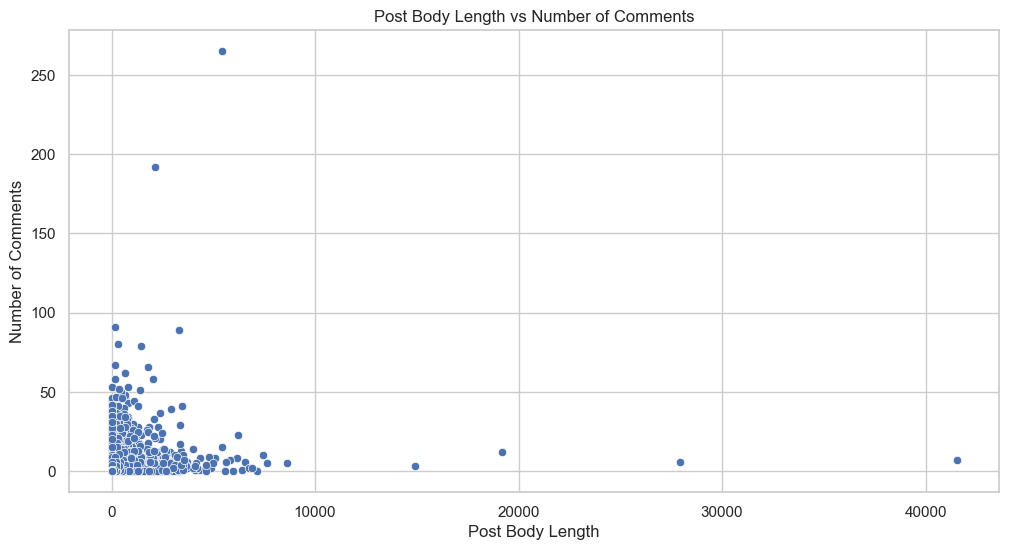

In [21]:
sns.scatterplot(x='selftext_length', y='num_comments', data=merged_df)
plt.title("Post Body Length vs Number of Comments")
plt.xlabel("Post Body Length")
plt.ylabel("Number of Comments")
plt.show()

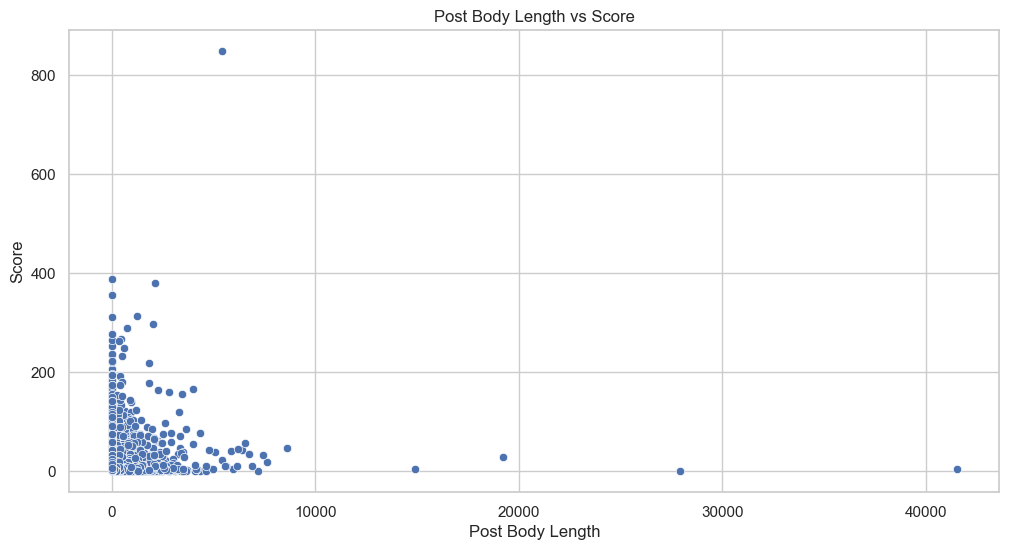

In [22]:
sns.scatterplot(x='selftext_length', y='score', data=merged_df)
plt.title("Post Body Length vs Score")
plt.xlabel("Post Body Length")
plt.ylabel("Score")
plt.show()

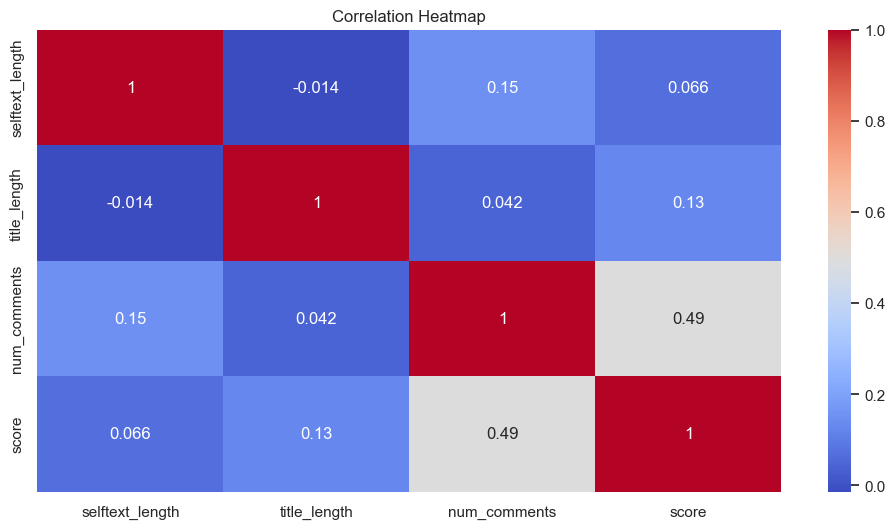

In [23]:
corr_cols = ['selftext_length', 'title_length', 'num_comments', 'score']
sns.heatmap(merged_df[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()